In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read TrainingWiDS2021 data into pandas as a DataFrame
url = 'https://github.com/areeratk/Diabetes_Mellitus/blob/main/Resources/TrainingWiDS2021.csv?raw=true'
df = pd.read_csv(url)

In [3]:
df.loc[:, 'ethnicity_encode'] = pd.factorize(df['ethnicity'])[0].reshape(-1,1)
df.loc[:, 'gender_encode'] = pd.factorize(df['gender'])[0].reshape(-1,1)
df.loc[:, 'hospital_admit_source_encode'] = pd.factorize(df['hospital_admit_source'])[0].reshape(-1,1)
df.loc[:, 'icu_admit_source_encode'] = pd.factorize(df['icu_admit_source'])[0].reshape(-1,1)
df.loc[:, 'icu_stay_type_encode'] = pd.factorize(df['icu_stay_type'])[0].reshape(-1,1)
df.loc[:, 'icu_type_encode'] = pd.factorize(df['icu_type'])[0].reshape(-1,1)
df = df.drop(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type'], axis=1)
df

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,ethnicity_encode,gender_encode,hospital_admit_source_encode,icu_admit_source_encode,icu_stay_type_encode,icu_type_encode
0,1,214826,118,68.0,22.732803,0,180.3,92,0.541667,0,...,0,0,0,1,0,0,0,0,0,0
1,2,246060,81,77.0,27.421875,0,160.0,90,0.927778,0,...,0,0,0,1,0,1,0,0,0,1
2,3,276985,118,25.0,31.952749,0,172.7,93,0.000694,0,...,0,0,0,0,0,1,1,1,0,1
3,4,262220,118,81.0,22.635548,1,165.1,92,0.000694,0,...,0,0,0,0,0,1,2,2,0,0
4,5,201746,33,19.0,NaN,0,188.0,91,0.073611,0,...,0,0,0,0,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,175.3,1109,0.023611,0,...,0,0,0,0,0,0,1,1,0,6
130153,130154,197653,7,79.0,29.653433,0,162.6,1106,0.009722,0,...,0,0,0,0,0,1,3,1,0,4
130154,130155,219719,7,73.0,32.265371,0,177.8,1104,0.143056,0,...,0,0,0,1,2,0,1,1,0,6
130155,130156,222562,170,81.0,24.408579,0,185.4,1108,0.188194,0,...,0,0,0,0,0,0,1,1,0,1


In [4]:
df = df.fillna(0)
df

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,ethnicity_encode,gender_encode,hospital_admit_source_encode,icu_admit_source_encode,icu_stay_type_encode,icu_type_encode
0,1,214826,118,68.0,22.732803,0,180.3,92,0.541667,0,...,0,0,0,1,0,0,0,0,0,0
1,2,246060,81,77.0,27.421875,0,160.0,90,0.927778,0,...,0,0,0,1,0,1,0,0,0,1
2,3,276985,118,25.0,31.952749,0,172.7,93,0.000694,0,...,0,0,0,0,0,1,1,1,0,1
3,4,262220,118,81.0,22.635548,1,165.1,92,0.000694,0,...,0,0,0,0,0,1,2,2,0,0
4,5,201746,33,19.0,0.000000,0,188.0,91,0.073611,0,...,0,0,0,0,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,175.3,1109,0.023611,0,...,0,0,0,0,0,0,1,1,0,6
130153,130154,197653,7,79.0,29.653433,0,162.6,1106,0.009722,0,...,0,0,0,0,0,1,3,1,0,4
130154,130155,219719,7,73.0,32.265371,0,177.8,1104,0.143056,0,...,0,0,0,1,2,0,1,1,0,6
130155,130156,222562,170,81.0,24.408579,0,185.4,1108,0.188194,0,...,0,0,0,0,0,0,1,1,0,1


In [5]:
#split dataset in features and target variable
feature_cols = [###'encounter_id',
 ###'hospital_id',
 'age',
 'bmi',
 ###'elective_surgery',
 'ethnicity_encode',
 'gender_encode',
 'height',
 'hospital_admit_source_encode',
 'icu_admit_source_encode',
 ###'icu_id',
 'icu_stay_type_encode',
 'icu_type_encode',
 ###'pre_icu_los_days',
 ###'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 #'bun_apache',
 #'creatinine_apache',
 #'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 ###'gcs_unable_apache',
 'gcs_verbal_apache',
 #'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 #'paco2_apache',
 #'paco2_for_ph_apache',
 'pao2_apache',
 #'ph_apache',
 'resprate_apache',
 ###'sodium_apache',
 'temp_apache',
 #'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 ###'d1_diasbp_noninvasive_max',
 ###'d1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 #'d1_mbp_invasive_max',
 #'d1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 ###'d1_mbp_noninvasive_max',
 ###'d1_mbp_noninvasive_min',
 'd1_resprate_max',
 ###'d1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 ###'d1_sysbp_noninvasive_max',
 ###'d1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 #'h1_diasbp_invasive_max',
 #'h1_diasbp_invasive_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 ###'h1_diasbp_noninvasive_max',
 ###'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 #'h1_mbp_invasive_max',
 #'h1_mbp_invasive_min',
 'h1_mbp_max',
 'h1_mbp_min',
 ###'h1_mbp_noninvasive_max',
 ###'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 #'h1_sysbp_invasive_max',
 #'h1_sysbp_invasive_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 ###'h1_sysbp_noninvasive_max',
 ###'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min',
 ###'d1_albumin_max',
 ###'d1_albumin_min',
 ###'d1_bilirubin_max',
 ###'d1_bilirubin_min',
 'd1_bun_max',
 ###'d1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 #'d1_creatinine_max',
 #'d1_creatinine_min',
 'd1_glucose_max',
 #'d1_glucose_min',
 'd1_hco3_max',
 ###'d1_hco3_min',
 ###'d1_hemaglobin_max',
 ###'d1_hemaglobin_min',
 ###'d1_hematocrit_max',
 ###'d1_hematocrit_min',
 'd1_inr_max',
 'd1_inr_min',
 #'d1_lactate_max',
 #'d1_lactate_min',
 'd1_platelets_max',
 ###'d1_platelets_min',
 ###'d1_potassium_max',
 'd1_potassium_min',
 ###'d1_sodium_max',
 'd1_sodium_min',
 ###'d1_wbc_max',
 ###'d1_wbc_min',
 #'h1_albumin_max',
 #'h1_albumin_min',
 #'h1_bilirubin_max',
 #'h1_bilirubin_min',
 ###'h1_bun_max',
 ###'h1_bun_min',
 ###'h1_calcium_max',
 ###'h1_calcium_min',
 ###'h1_creatinine_max',
 ###'h1_creatinine_min',
 'h1_glucose_max',
 ###'h1_glucose_min',
 ###'h1_hco3_max',
 ###'h1_hco3_min',
 ###'h1_hemaglobin_max',
 ###'h1_hemaglobin_min',
 ###'h1_hematocrit_max',
 ###'h1_hematocrit_min',
 ###'h1_inr_max',
 ###'h1_inr_min',
 #'h1_lactate_max',
 #'h1_lactate_min',
 ###'h1_platelets_max',
 ###'h1_platelets_min',
 'h1_potassium_max',
 ###'h1_potassium_min',
 ###'h1_sodium_max',
 ###'h1_sodium_min',
 ###'h1_wbc_max',
 ###'h1_wbc_min',
 ###'d1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 ###'h1_arterial_pco2_max',
 ###'h1_arterial_pco2_min',
 ###'h1_arterial_ph_max',
 ###'h1_arterial_ph_min',
 'h1_arterial_po2_max',
 'h1_arterial_po2_min',
 'h1_pao2fio2ratio_max',
 ###'h1_pao2fio2ratio_min',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis' ]
X = df[feature_cols] # Features
y = df.diabetes_mellitus # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7405259013118721


In [9]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     40735
           1       0.41      0.43      0.42     11328

    accuracy                           0.74     52063
   macro avg       0.62      0.63      0.63     52063
weighted avg       0.75      0.74      0.74     52063



[Text(1536.1677159794183, 2148.514285714286, 'd1_glucose_max <= 189.5\ngini = 0.338\nsamples = 78094\nvalue = [61271, 16823]\nclass = 0'),
 Text(923.7061290912927, 2096.7428571428572, 'd1_glucose_max <= 144.5\ngini = 0.207\nsamples = 57086\nvalue = [50394, 6692]\nclass = 0'),
 Text(578.7684239490482, 2044.9714285714285, 'bmi <= 33.238\ngini = 0.139\nsamples = 38961\nvalue = [36027, 2934]\nclass = 0'),
 Text(409.7714999850992, 1993.2, 'arf_apache <= 0.5\ngini = 0.113\nsamples = 31776\nvalue = [29871, 1905]\nclass = 0'),
 Text(251.67419211498606, 1941.4285714285716, 'age <= 57.5\ngini = 0.105\nsamples = 31011\nvalue = [29293, 1718]\nclass = 0'),
 Text(93.45157336602075, 1889.6571428571428, 'd1_bun_max <= 22.5\ngini = 0.05\nsamples = 13013\nvalue = [12681, 332]\nclass = 0'),
 Text(56.5909492642408, 1837.8857142857144, 'age <= 45.5\ngini = 0.04\nsamples = 10955\nvalue = [10731, 224]\nclass = 0'),
 Text(21.983392543145662, 1786.1142857142859, 'age <= 8.0\ngini = 0.026\nsamples = 6409\nvalue

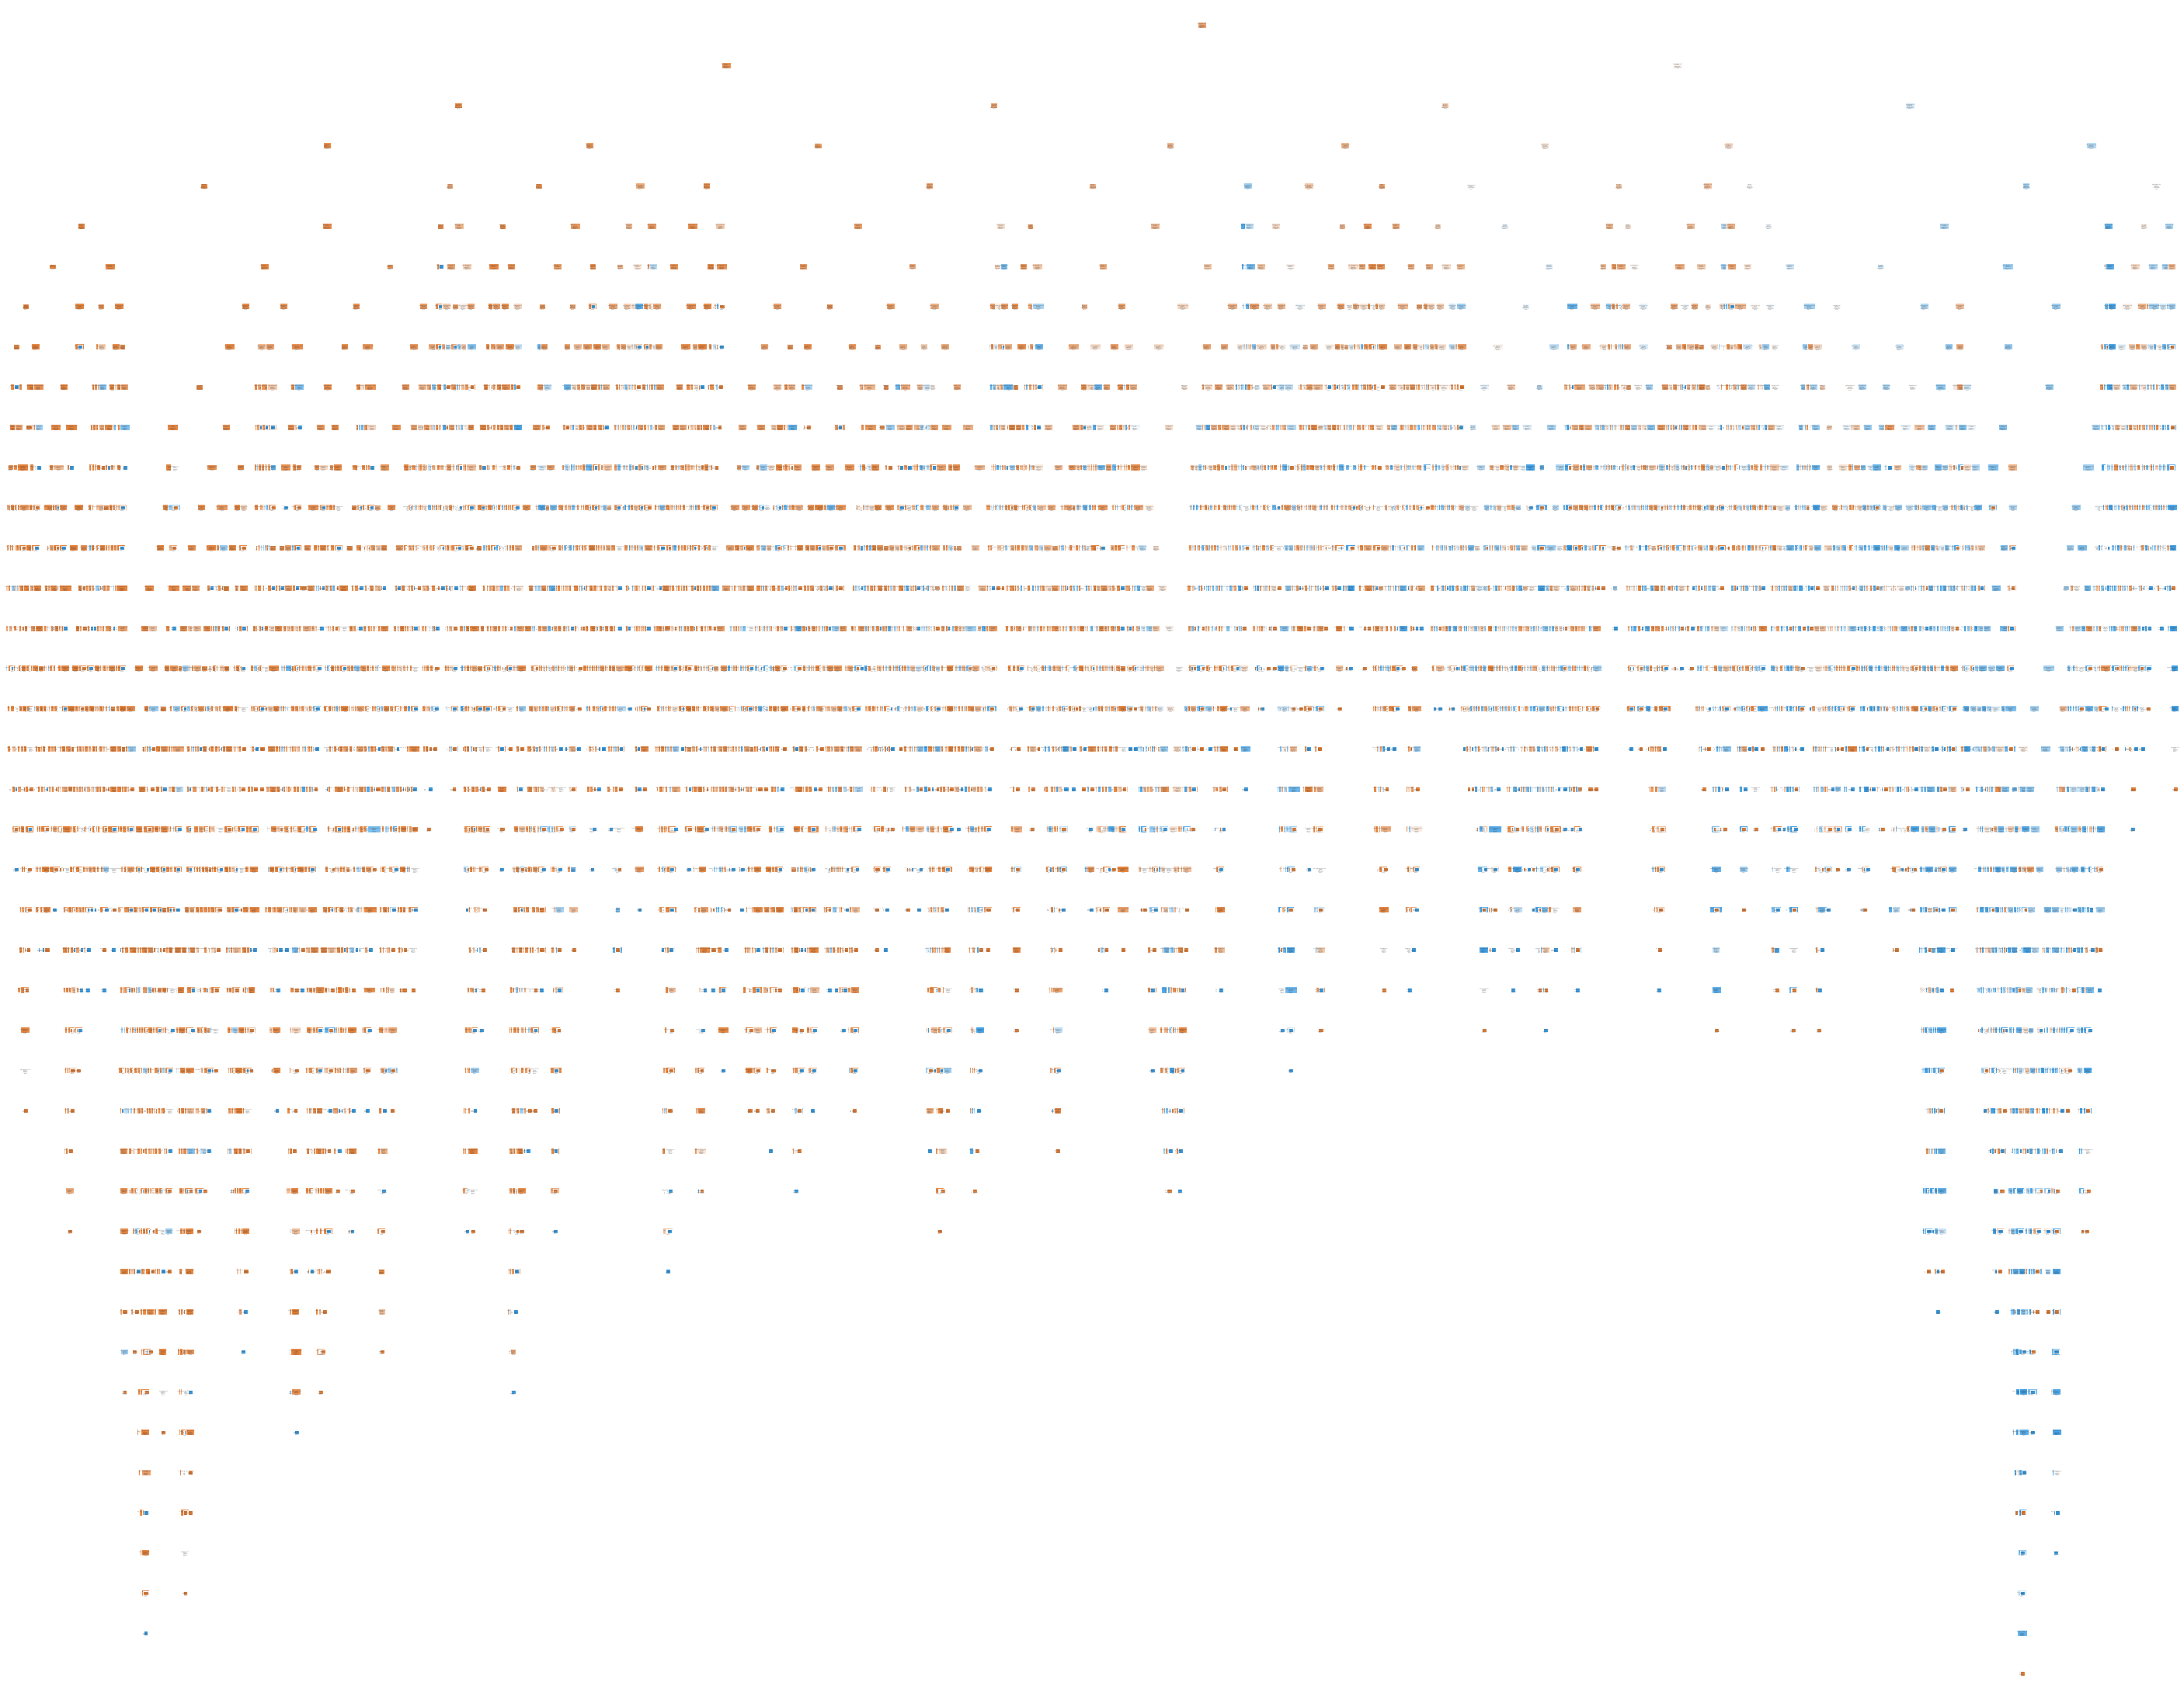

In [10]:
from sklearn import tree
fig = plt.figure(figsize=(50,40))
tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

In [16]:
fig.savefig("decistion_tree.png")

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8192958531010507

In [18]:
sorted(zip(rf.feature_importances_, feature_cols), reverse=True)

[(0.13583761055360555, 'd1_glucose_max'),
 (0.043776409959778294, 'h1_glucose_max'),
 (0.030715842990155662, 'bmi'),
 (0.02642037753605547, 'weight'),
 (0.02401230886718826, 'd1_bun_max'),
 (0.02102543105828236, 'age'),
 (0.016401692945431624, 'd1_sysbp_max'),
 (0.016111762344301516, 'apache_3j_diagnosis'),
 (0.015561611554057466, 'd1_sysbp_min'),
 (0.015225250798895171, 'heart_rate_apache'),
 (0.015201278978836464, 'd1_heartrate_max'),
 (0.014874298652756019, 'd1_platelets_max'),
 (0.01487253715897544, 'd1_diasbp_max'),
 (0.01464010410909526, 'hematocrit_apache'),
 (0.01462253569094349, 'apache_2_diagnosis'),
 (0.014556699456845481, 'h1_sysbp_max'),
 (0.014459620764503309, 'd1_heartrate_min'),
 (0.014245897788233194, 'wbc_apache'),
 (0.014215684320525604, 'height'),
 (0.014210234240798748, 'd1_mbp_max'),
 (0.014179637468409157, 'h1_sysbp_min'),
 (0.01397294798002148, 'map_apache'),
 (0.013968889189371432, 'resprate_apache'),
 (0.01391302620178948, 'h1_heartrate_max'),
 (0.013911522701